<a href="https://colab.research.google.com/github/nidhi-158/FeynnLabs_EV-market/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
df=pd.read_csv("/content/data (2) (1).csv")

In [ ]:
df.head()

,Unnamed: 0,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB


In [ ]:
df.describe()

,Unnamed: 0,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,51.000000,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,29.877528,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,0.000000,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,25.500000,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,51.000000,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,76.500000,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,102.000000,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [ ]:
df['Seats'].unique()

array([5, 4, 7, 6, 2])

In [ ]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
categorical_column=['Brand','Model','PowerTrain','PlugType','BodyStyle','Segment','RapidCharge']
numeric_columns=['AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH','Seats','PriceEuro']

In [ ]:
df['PowerTrain'].unique()

array([0, 2, 1])

In [ ]:
LE=LabelEncoder()
for column in categorical_column:
  df[column]=LE.fit_transform(df[column])

In [ ]:
scaler=StandardScaler()
df[numeric_columns]=scaler.fit_transform(df[numeric_columns])

In [ ]:
# Count the number of vehicles for each combination of 'Brand' and 'Seats'
count_by_brand_seats = df.groupby(['Brand', 'Seats']).size().reset_index(name='Count')
print(count_by_brand_seats)

    Brand     Seats  Count
0       0  0.147109      1
1       1 -1.115578      1
2       1  0.147109      8
3       2 -1.115578      2
4       2  0.147109      2
5       3  0.147109      3
6       4 -1.115578      1
7       5  0.147109      1
8       6  0.147109      1
9       7 -1.115578      2
10      8  0.147109      4
11      9 -1.115578      2
12     10  0.147109      3
13     11  0.147109      1
14     12  0.147109      5
15     13  0.147109      1
16     14  0.147109      1
17     15  0.147109      1
18     16  0.147109      1
19     17  0.147109      1
20     18  0.147109      2
21     18  2.672484      1
22     19 -1.115578      1
23     20  0.147109      7
24     20  2.672484      1
25     21  0.147109      3
26     22  0.147109      2
27     23  0.147109      1
28     24 -1.115578      5
29     25 -1.115578      1
30     25  0.147109      4
31     26 -1.115578      1
32     27 -1.115578      1
33     27  0.147109      5
34     28 -3.640953      2
35     28 -1.115578      1
3

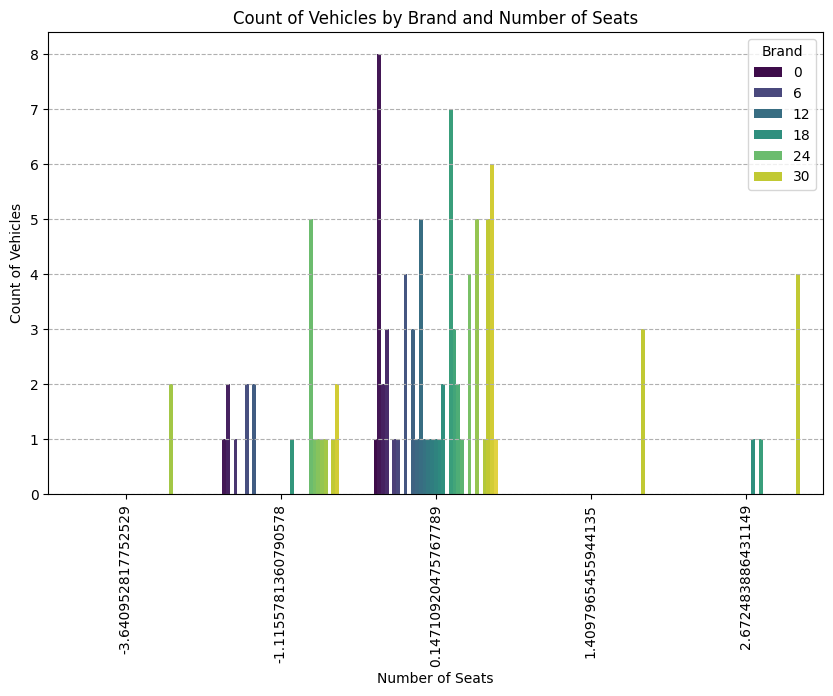

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=count_by_brand_seats, x='Seats', y='Count', hue='Brand', palette='viridis')
plt.title('Count of Vehicles by Brand and Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Count of Vehicles')
plt.legend(title='Brand')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=90)
plt.show()

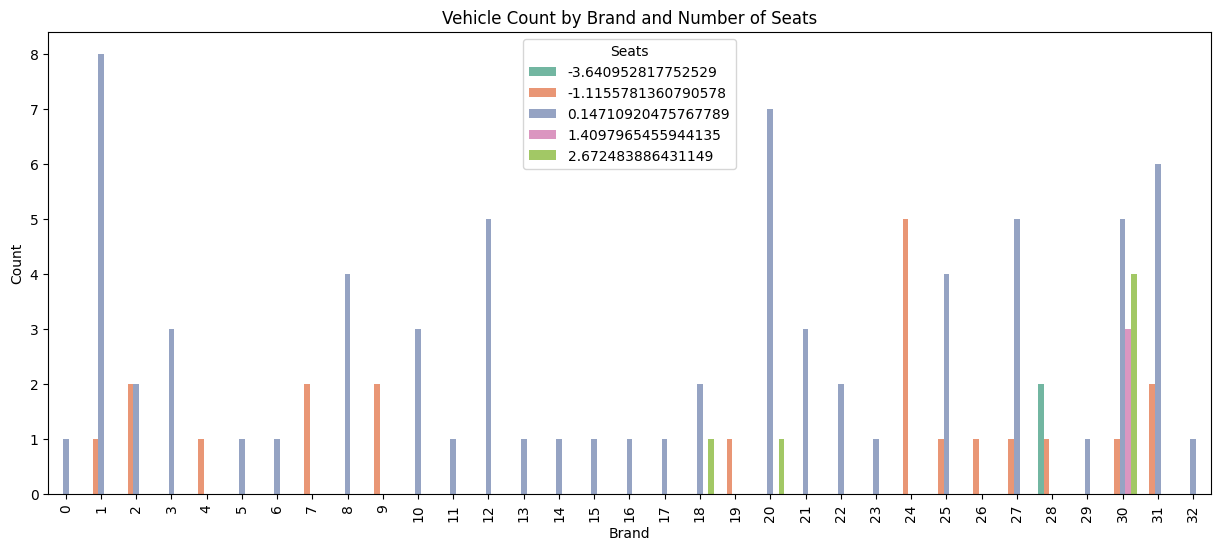

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Brand', hue='Seats', palette='Set2')
plt.title('Vehicle Count by Brand and Number of Seats')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.legend(title='Seats')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#count number of vehicle according to plug type
plug_type_count= df['PlugType'].value_counts().reset_index()

#reset columns
plug_type_count.columns = ['PlugType', 'Vehicle Count']

plug_type_count

,PlugType,Vehicle Count
0,2,90
1,1,9
2,3,3
3,0,1


<ipython-input-22-44745ec509ef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PlugType', y='Vehicle Count', data=plug_type_count, palette='viridis')


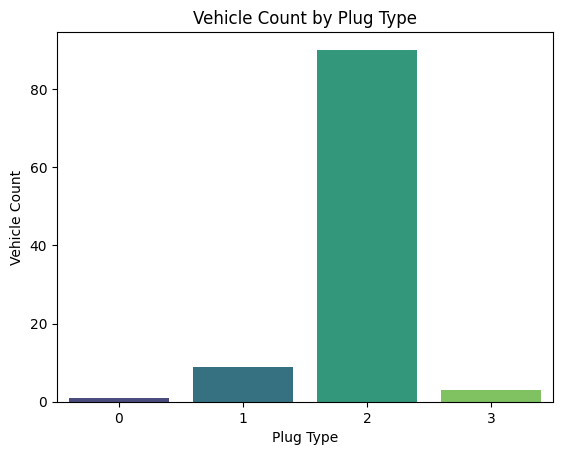

In [ ]:
sns.barplot(x='PlugType', y='Vehicle Count', data=plug_type_count, palette='viridis')
plt.title('Vehicle Count by Plug Type')
plt.xlabel('Plug Type')
plt.ylabel('Vehicle Count')
plt.show()


In [ ]:
#count number of vehicles according to power train
power_train=df['PowerTrain'].value_counts().reset_index()
power_train.columns=['PowerTrain','Vehicle Count']


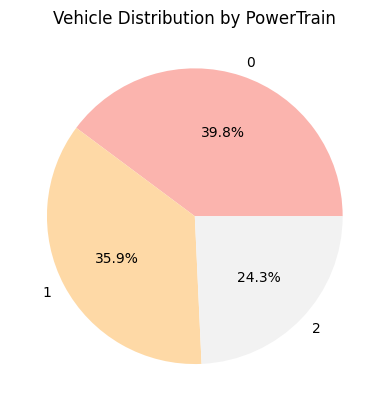

In [ ]:
plt.pie(
    power_train['Vehicle Count'],
    labels=power_train['PowerTrain'],
    autopct='%1.1f%%',
    colors=plt.get_cmap('Pastel1')(np.linspace(0, 1, len(power_train))),  # Generate colors from the colormap
    #startangle=140
)

plt.title('Vehicle Distribution by PowerTrain')
plt.show()

<ipython-input-25-6cb635c0f384>:12: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(data=percentages, x='Brand', y='Percentage', hue='RapidCharge', palette=qual_palette)


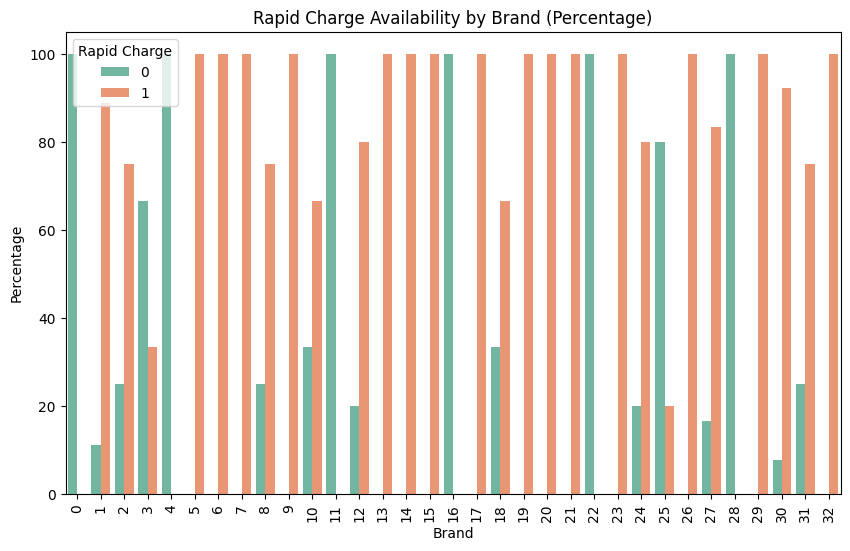

In [ ]:
counts = df.groupby(['Brand', 'RapidCharge']).size().unstack().fillna(0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Reset index to plot with seaborn
percentages = percentages.reset_index().melt(id_vars='Brand', var_name='RapidCharge', value_name='Percentage')

# Set a qualitative color palette
qual_palette = sns.color_palette("Set2")

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages, x='Brand', y='Percentage', hue='RapidCharge', palette=qual_palette)
plt.title('Rapid Charge Availability by Brand (Percentage)')
plt.xlabel('Brand')
plt.ylabel('Percentage')
plt.legend(title='Rapid Charge')
plt.xticks(rotation=90)
plt.show()

In [ ]:
X = df.drop('PriceEuro', axis=1)
y=df['PriceEuro']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 0.39562830081467387
Mean Squared Error: 0.28752950201923105
R-squared: 0.5816470344180686


Text(0, 0.5, 'Predicted Prices')

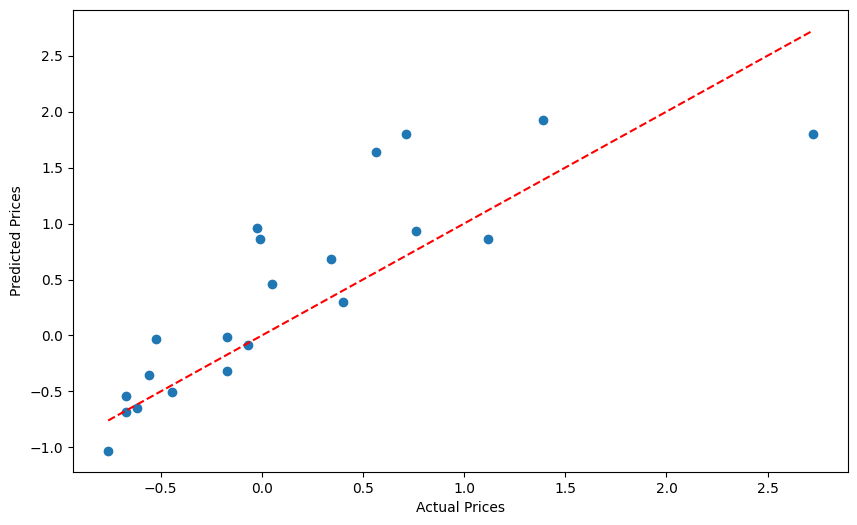

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

In [ ]:
df['PowerTrain'].unique()

array([0, 2, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

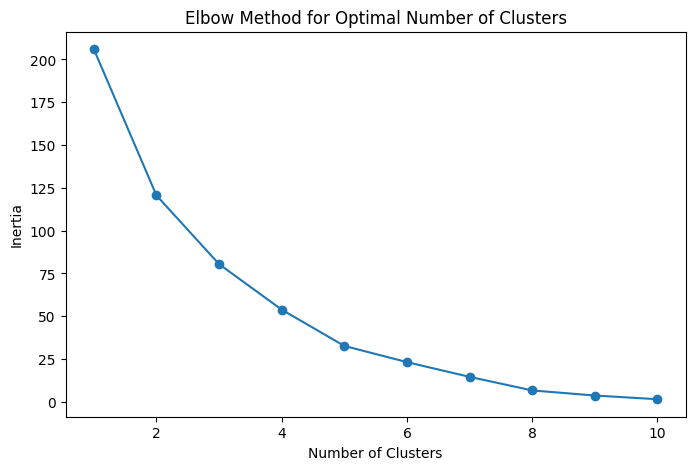

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


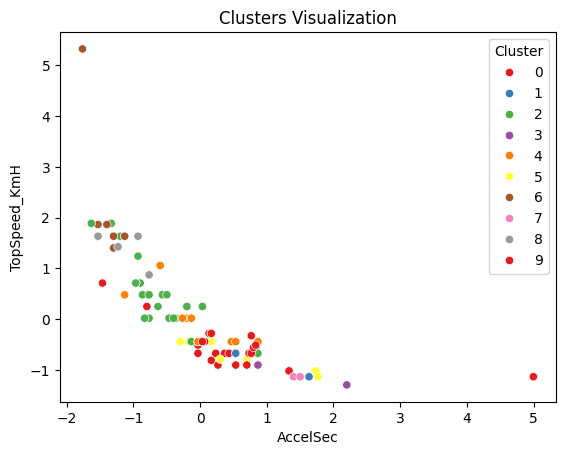

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X_cluster = df[['Seats','PowerTrain']]

# Scale features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Determine the number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit KMeans with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualize clustering results
sns.scatterplot(data=df, x='AccelSec', y='TopSpeed_KmH', hue='Cluster', palette='Set1')
plt.title('Clusters Visualization')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
silhouette_avg = silhouette_score(X_cluster_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.9834553388555052


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.481e-01, tolerance: 8.257e-03
  model = cd_fast.enet_coordinate_descent(


Ridge Mean Absolute Error: 0.32891411165193957
Ridge Mean Squared Error: 0.35194936965930496
Ridge R-squared: 0.4879166781229505
Lasso Mean Absolute Error: 0.2773009931533313
Lasso Mean Squared Error: 0.12575572691530135
Lasso R-squared: 0.8170264931964824


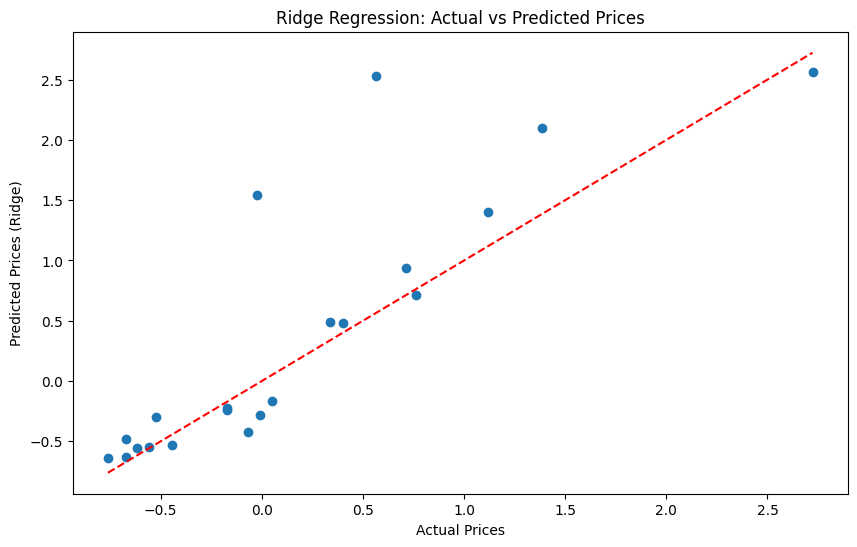

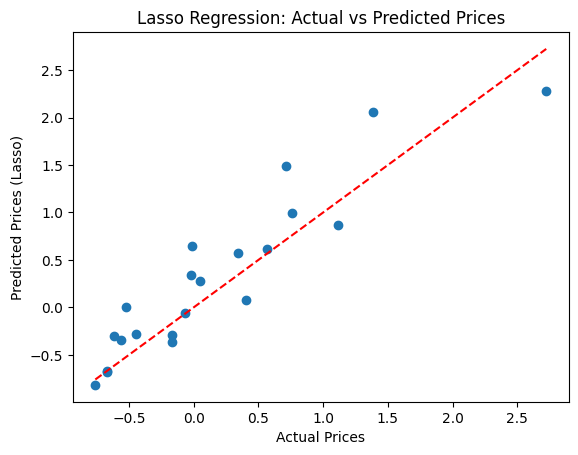

In [ ]:
# Import necessary libraries for polynomial features and feature selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create Ridge and Lasso regression models with hyperparameter tuning
ridge = Ridge()
lasso = Lasso()

# Define hyperparameters for tuning
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}

# Perform Grid Search to find the best parameters
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5)
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5)

# Fit the models
ridge_cv.fit(X_train_poly, y_train)
lasso_cv.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_ridge = ridge_cv.predict(X_test_poly)
y_pred_lasso = lasso_cv.predict(X_test_poly)

# Evaluate the models
print(f"Ridge Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"Ridge Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Ridge R-squared: {r2_score(y_test, y_pred_ridge)}")

print(f"Lasso Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"Lasso Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Lasso R-squared: {r2_score(y_test, y_pred_lasso)}")

# Visualize Ridge predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Ridge)')
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.show()

# Visualize Lasso predictions
#plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Lasso)')
plt.title('Lasso Regression: Actual vs Predicted Prices')
plt.show()
